# Electric Vehicle Data Analysis and Visualization Milestone 2

First source of data, that I have collected, is from the below website which shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2

https://catalog.data.gov/dataset/electric-vehicle-population-data/resource/fa51be35-691f-45d2-9f3e-535877965e69?inner_span=True

In [16]:
import pandas as pd
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [17]:
df.shape

(112634, 17)

In [18]:
df.dtypes


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# Step1 : Lets update the header and data for Electric Vehicle Type

In [19]:
#lets check the vechicle types first
df[['Electric Vehicle Type']].value_counts()

Electric Vehicle Type                 
Battery Electric Vehicle (BEV)            86044
Plug-in Hybrid Electric Vehicle (PHEV)    26590
dtype: int64

In [20]:
def vehicle_type(row):
    if row == 'Battery Electric Vehicle (BEV)':
        return 'BEV'
    if row == 'Plug-in Hybrid Electric Vehicle (PHEV)':
        return 'PHEV'
    
df['Vehicle Type'] = df['Electric Vehicle Type'].apply(lambda row: vehicle_type(row))
df = df.drop('Electric Vehicle Type', axis=1)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Type
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100,PHEV
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702,PHEV
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602,BEV
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101,BEV
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500,PHEV


# Step2: Lets update the column name and data for Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [21]:
#lets check the vechicle types first
df[['Clean Alternative Fuel Vehicle (CAFV) Eligibility']].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility           
Clean Alternative Fuel Vehicle Eligible                         58639
Eligibility unknown as battery range has not been researched    39236
Not eligible due to low battery range                           14759
dtype: int64

In [22]:
def cafv_eligibility(row):
    if row == 'Clean Alternative Fuel Vehicle Eligible':
        return 'Eligible'
    if row == 'Eligibility unknown as battery range has not been researched':
        return 'Unknown'
    if row == 'Not eligible due to low battery range':
        return 'Not Eligible'
    
df['CAFV Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda row: cafv_eligibility(row))
df = df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Type,CAFV Eligibility
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100,PHEV,Eligible
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702,PHEV,Eligible
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602,BEV,Eligible
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101,BEV,Eligible
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500,PHEV,Not Eligible


# Step3: Transformation on Electric Range, here lets create an Electric Range Category based on Electric Range.

<AxesSubplot:ylabel='Frequency'>

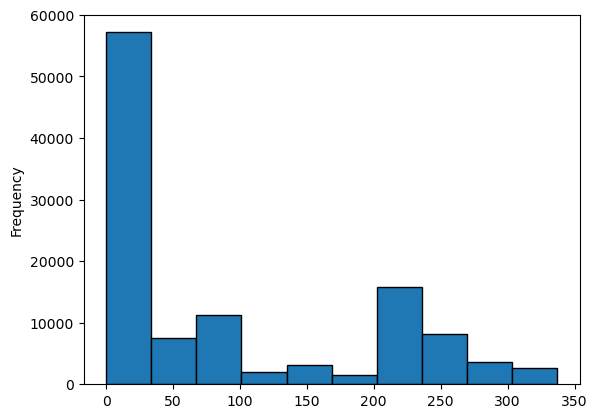

In [23]:
df['Electric Range'].plot(kind='hist', edgecolor='black')

In [24]:
def electric_range(row):
    if row < 100:
        return 'Low'
    elif row <= 250:
        return 'Mid'
    else:
        return 'High'
    
df['Electric Range Category'] = df['Electric Range'].apply(lambda row: electric_range(row))
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Type,CAFV Eligibility,Electric Range Category
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100,PHEV,Eligible,Low
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702,PHEV,Eligible,Low
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602,BEV,Eligible,Low
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101,BEV,Eligible,Mid
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500,PHEV,Not Eligible,Low


# Step4 : Data Cleaning, lets do some cleaning on the Legislative District

In [40]:
df[['Legislative District']].isnull().sum() 
#There are 286 records for which Legislative District are missing, because those data belong to other state.

Legislative District    286
dtype: int64

In [35]:
#Here are the missing percentage of 
df[df['State'].isin(['WA'])].isnull().sum() 

VIN (1-10)                   0
County                       0
City                         0
State                        0
Postal Code                  0
Model Year                   0
Make                         0
Model                       20
Electric Range               0
Base MSRP                    0
Legislative District         0
DOL Vehicle ID               0
Vehicle Location            19
Electric Utility           157
2020 Census Tract            0
Vehicle Type                 0
CAFV Eligibility             0
Electric Range Category      0
dtype: int64

In [36]:
df[df['State'].isin(['WA'])].shape[0] 

112348

In [ ]:
#Lets delete these records where the state is different then Washington State, as this is like outlier to the actual source, 
#there are very few cars those are being registered from washington state for other state.

In [41]:
df = df[df['State'].isin(['WA'])]

In [42]:
df.isnull().sum()

VIN (1-10)                   0
County                       0
City                         0
State                        0
Postal Code                  0
Model Year                   0
Make                         0
Model                       20
Electric Range               0
Base MSRP                    0
Legislative District         0
DOL Vehicle ID               0
Vehicle Location            19
Electric Utility           157
2020 Census Tract            0
Vehicle Type                 0
CAFV Eligibility             0
Electric Range Category      0
dtype: int64

# Step5 : Lets eleminate records where Model is missing and Electric Utility is missing

In [47]:
df = df.dropna(axis = 0)

In [48]:
df.isnull().sum()

VIN (1-10)                 0
County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                      0
Electric Range             0
Base MSRP                  0
Legislative District       0
DOL Vehicle ID             0
Vehicle Location           0
Electric Utility           0
2020 Census Tract          0
Vehicle Type               0
CAFV Eligibility           0
Electric Range Category    0
dtype: int64

# Step 6: Analysis on base price

<AxesSubplot:ylabel='Frequency'>

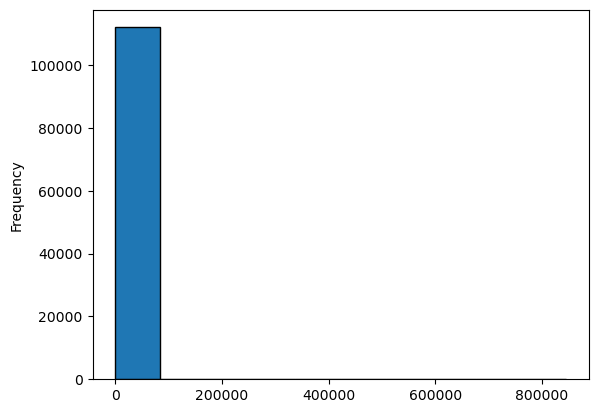

In [49]:
df['Base MSRP'].plot(kind='hist', edgecolor='black')

In [53]:
print(df['Base MSRP'].max(),df['Base MSRP'].min())

845000 0


In [54]:
df[['Base MSRP']].value_counts()

Base MSRP
0            108654
69900          1493
31950           406
52900           213
32250           158
54950           135
59900           134
39995           118
36900           100
44100            95
64950            82
33950            78
45600            76
52650            67
34995            58
36800            50
55700            47
53400            28
110950           24
98950            23
81100            19
102000           19
90700            18
75095            16
184400           12
43700            10
89100             7
109000            7
91250             4
845000            1
dtype: int64

In [59]:
df.loc[df['Base MSRP'] == 845000].head()
#High range for this record is due to its brand i.e. PORSCHE.

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Type,CAFV Eligibility,Electric Range Category
62533,WP0CA2A13F,King,Hunts Point,WA,98004,2015,PORSCHE,918,12,845000,48.0,100479039,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024100,PHEV,Not Eligible,Low


In [60]:
print("percentage of vahicles where value is 0 = {}".format(df.loc[df['Base MSRP'] == 0].shape[0]/df.shape[0]))

percentage of vahicles where value is 0 = 0.9688101861759041


In [63]:
#So lets delete this Base MSRP field as 96% of this is 0
df=df.drop('Base MSRP',axis=1)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Type,CAFV Eligibility,Electric Range Category
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,73,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602,BEV,Eligible,Low
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,238,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101,BEV,Eligible,Mid
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,26,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500,PHEV,Not Eligible,Low
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,215,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916,BEV,Eligible,Mid
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,75,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900,BEV,Eligible,Low
